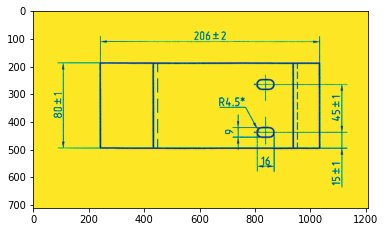

In [2]:
import itertools
from importlib import reload

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

from dataset import get_dataloaders_unsupervised, get_dataloaders_supervised

dataset, dataloader = get_dataloaders_supervised(fraction=1.0)

img, mask = dataset[2]

plt.imshow(img.squeeze())
plt.show()

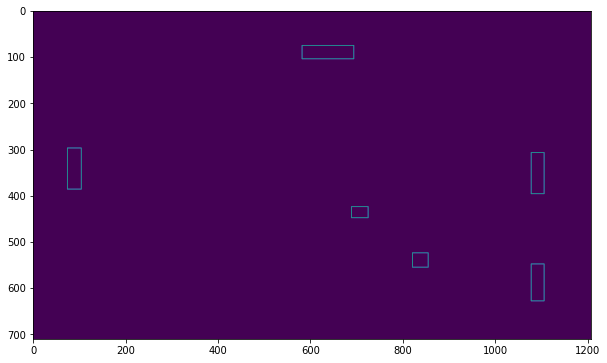

In [8]:
# img = img.squeeze(0).transpose(0, 2).numpy()
mask = mask.numpy()[2]
mask = (mask * 255).astype(np.uint8)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_img = cv2.drawContours(cv2.UMat(np.zeros_like(mask)), contours, -1, 255)

plt.figure(figsize=[10, 10])
plt.imshow(contours_img.get())
plt.show()

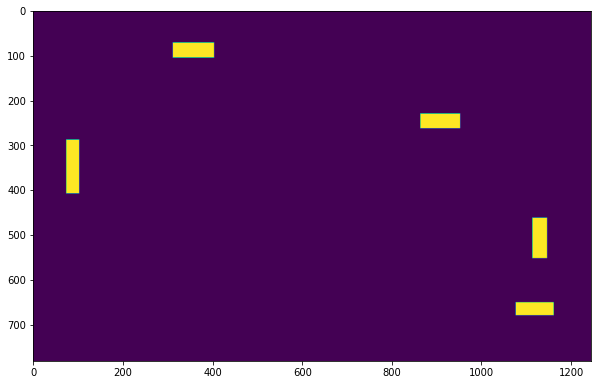

In [67]:
my_shit = np.zeros_like(img)

for contour in contours:
    sorted_contours = contour.squeeze()[np.lexsort(np.rot90(contour.squeeze()))]
    (x1, y1), _, _, (x2, y2) = sorted_contours
    my_shit[0, y1:y2, x1:x2] = 255

plt.figure(figsize=[10, 10])
plt.imshow(my_shit.squeeze())
plt.show()

In [4]:
cnt = 0

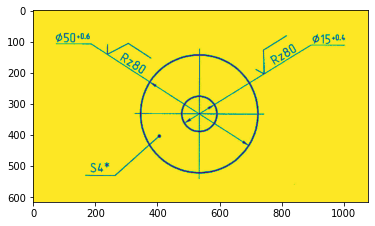

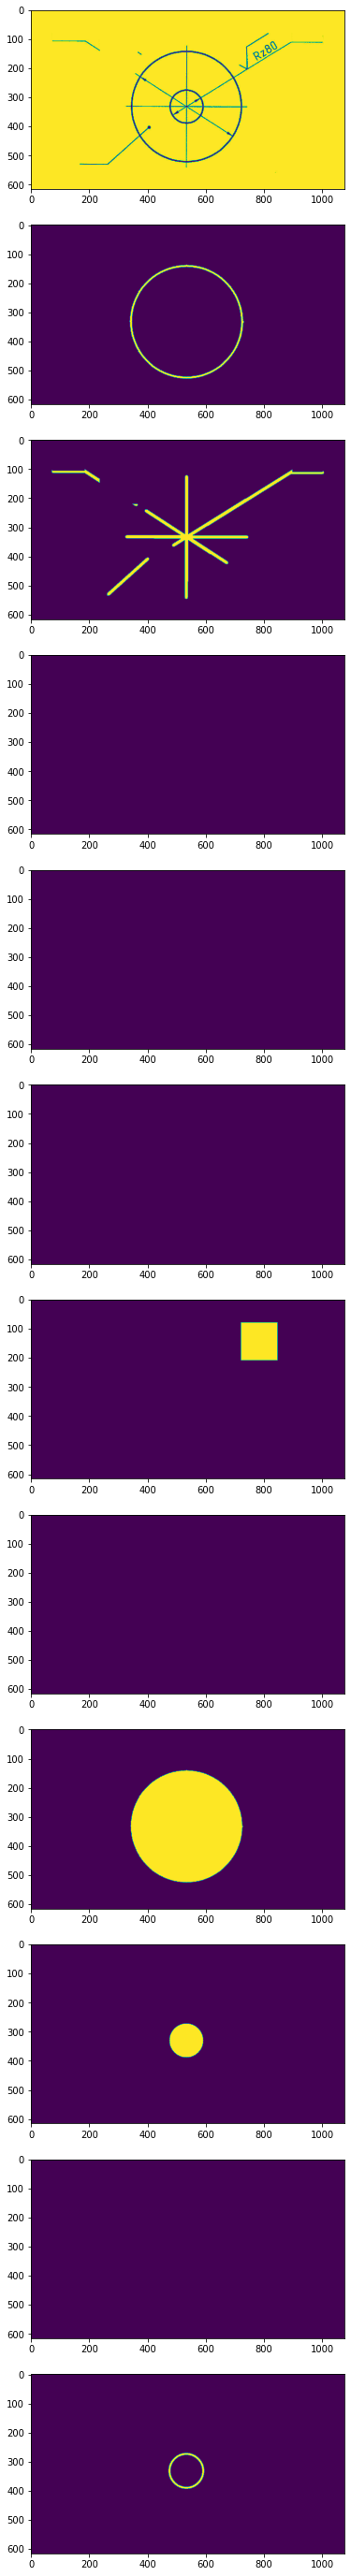

In [5]:
img, mask = dataset[cnt]
cnt += 1

# from augmentation import HideRectangle
import augmentation
from importlib import reload

reload(augmentation)

aug = augmentation.HideRectangle(min_cnt=1, max_cnt=4, always_apply=True, channels=[2, 3, 4, 5],
                                 exclude_masks=[7],fill_mask=0, fill_image=1)

augmented = aug(image=img.squeeze().clone(), masks=[m.clone() for m in mask.clone()])

img_aug, masks_aug = augmented['image'], augmented['masks']

plt.imshow(img.squeeze())
plt.show()
fig, ax = plt.subplots(12, 1, figsize=[30, 50])
ax[0].imshow(img_aug.squeeze())
for i in range(11):
    ax[1 + i].imshow(masks_aug[i])
plt.show()